# --- Non-linear dataset (swiss roll) -----------------------------------------------------------

## Populate swiss-roll dataset

In [2]:
from sklearn import datasets

In [15]:
X, color = datasets.make_swiss_roll(n_samples=5000, noise=0.0)

In [16]:
Y_labels = ['X', 'Y', 'Z']

## Prepare data (feature scaling)

In [24]:
from sklearn import preprocessing

In [31]:
std_scale = preprocessing.StandardScaler().fit(X)

In [37]:
X_scaled = std_scale.transform(X)
#X_scaled = X

In [42]:
#X_scaled += 1
X_scaled += 2
X_scaled

array([[3.71789888, 4.9579989 , 4.40528709],
       [1.85100616, 3.43520269, 2.90860278],
       [3.20719465, 3.16264596, 4.60531312],
       ...,
       [4.02830815, 3.76080136, 5.28567483],
       [4.11713722, 2.99423634, 3.3971861 ],
       [5.07094644, 2.051078  , 3.63893911]])

## Apply t-SNE dimentionality reduction

In [43]:
from sklearn import decomposition
nmf = decomposition.NMF(n_components=2, init='random', random_state=0)

In [44]:
from time import time

In [45]:
t0 = time()
X_projected_nmf = nmf.fit_transform(X_scaled)
t1 = time()

/home/valkea/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [46]:
print("Time:", t1-t0)

Time: 0.04659128189086914


## Plot

In [47]:
import matplotlib.pyplot as plt

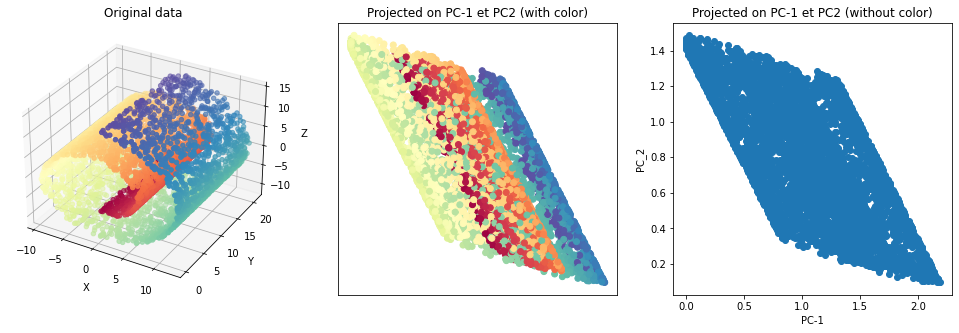

In [49]:
fig = plt.figure(figsize=(17,5))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original data")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax = fig.add_subplot(132)
ax.scatter(X_projected_nmf[:, 0], X_projected_nmf[:, 1], c=color , cmap=plt.cm.Spectral)
plt.xticks([]), plt.yticks([])
plt.title('Projected on PC-1 et PC2 (with color)')

ax = fig.add_subplot(133)
ax.scatter(X_projected_nmf[:, 0], X_projected_nmf[:, 1])
#plt.xticks([]), plt.yticks([])
plt.title('Projected on PC-1 et PC2 (without color)')
ax.set_xlabel("PC-1")
ax.set_ylabel("PC_2")

plt.show()

# === PCA comparison ===========================================

## Prepare data (feature scaling)

In [13]:
from sklearn import preprocessing

In [14]:
std_scale = preprocessing.StandardScaler().fit(X)

In [15]:
X_scaled = std_scale.transform(X)

## Apply PCA dimentionality reduction

In [16]:
from sklearn import decomposition

In [17]:
pca = decomposition.PCA(n_components=2)

#### Decompose

In [18]:
pca.fit(X_scaled)

PCA(n_components=2)

#### Examine explained variance

...

#### Project

In [19]:
X_projected_pca = pca.transform(X_scaled)
X_projected_pca.shape

(5000, 2)

## Plot

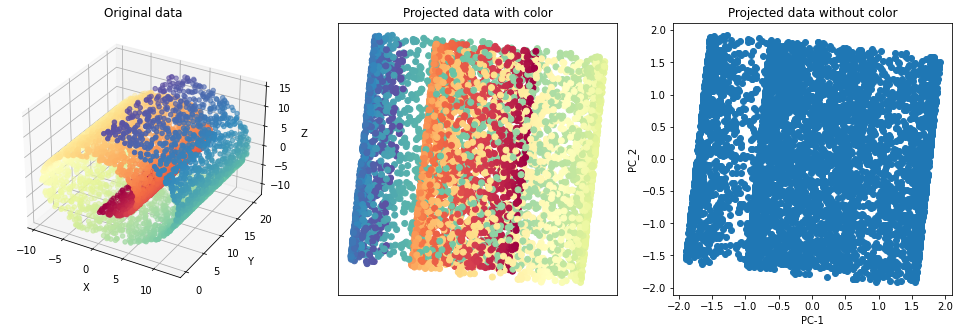

In [20]:
fig = plt.figure(figsize=(17,5))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original data")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax = fig.add_subplot(132)
ax.scatter(X_projected_pca[:, 0], X_projected_pca[:, 1], c=color, cmap=plt.cm.Spectral)
plt.xticks([]), plt.yticks([])
plt.title('Projected data with color')

ax = fig.add_subplot(133)
ax.scatter(X_projected_pca[:, 0], X_projected_pca[:, 1])
#plt.xticks([]), plt.yticks([])
plt.title('Projected data without color')
ax.set_xlabel("PC-1")
ax.set_ylabel("PC_2")

plt.show()

## --- Notes ----------------------------------------------------------------------------------------------------------------

PCA doesn't works well with non-linearly separable datasets... 

k-PCA doesn't seems useful on this kind of dataset.

We should try with some other non-linear dataset...